# Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. 
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки 
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston

boston = load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

In [4]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [6]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


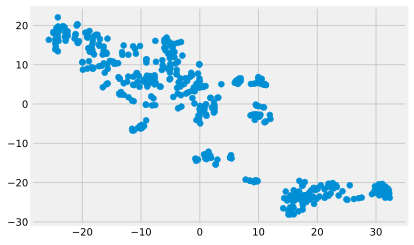

In [7]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

# Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, 
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.

In [8]:
from sklearn.cluster import KMeans

In [9]:
KMeans?

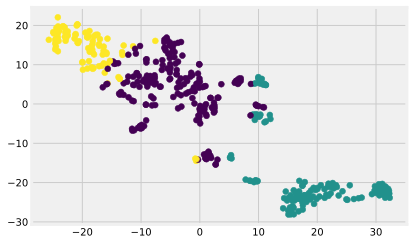

In [10]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

labels_train = kmeans.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

In [11]:
labels_test = kmeans.predict(X_test_scaled)

In [12]:
# Price`

In [13]:
y_train.mean()

22.796534653465343

In [14]:
y_train[labels_train == 0].mean()

24.971204188481675

In [17]:
y_train[labels_train == 1].mean()

16.1796875

In [27]:
y_train[labels_train == 2].mean()

27.87411764705882

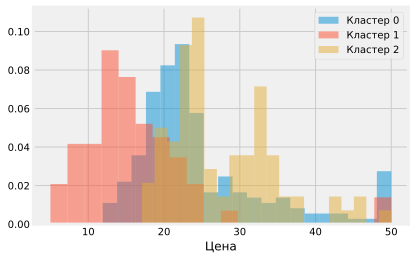

In [29]:
plt.hist(y_train[labels_train == 0], bins=20, density=True, alpha=0.5)
plt.hist(y_train[labels_train == 1], bins=20, density=True, alpha=0.5)
plt.hist(y_train[labels_train == 2], bins=20, density=True, alpha=0.5)

plt.legend(['Кластер 0', 'Кластер 1', 'Кластер 2'])
plt.xlabel('Цена')

plt.show()

In [ ]:
#кластеры различаются по цене
# Кластер 1 - bimodal distr?

CRIM     per capita crime rate by town

In [30]:
print('Кластер 0: {}'.format(X_train.loc[labels_train == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_train.loc[labels_train == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_train.loc[labels_train == 2, 'CRIM'].mean()))

Кластер 0: 0.42098554973821983
Кластер 1: 10.637094062500003
Кластер 2: 0.0721184705882353


In [ ]:
#криманальность разная

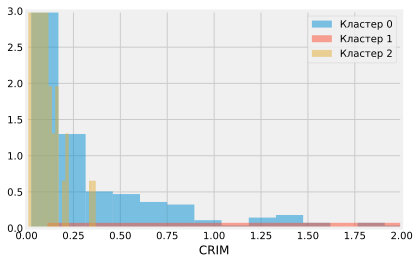

In [35]:
plt.hist(X_train.loc[labels_train == 0, 'CRIM'], bins=20, density=True, alpha=0.5)
plt.hist(X_train.loc[labels_train == 1, 'CRIM'], bins=20, density=True, alpha=0.5)
plt.hist(X_train.loc[labels_train == 2, 'CRIM'], bins=20, density=True, alpha=0.5)

plt.xlim(0, 12)
plt.legend(['Кластер 0', 'Кластер 1', 'Кластер 2'])
plt.xlabel('CRIM')
plt.xlim(0,2)
plt.ylim(0,3)

plt.show()

# Задание 3 *

Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()

lr.fit(X_train_scaled, y_train)

y_test_pred = lr.predict(X_test_scaled)

r2_score(y_test, y_test_pred)

0.6684825753971604

In [24]:
#Cluster 0
lr.fit(X_train_scaled.loc[labels_train == 0], y_train[labels_train == 0])

y_test_pred_0 = lr.predict(X_test_scaled.loc[labels_test == 0])

r2_score(y_test[labels_test == 0], y_test_pred_0)

0.7270040274288261

In [25]:
#cluster 1
lr.fit(X_train_scaled.loc[labels_train == 1], y_train[labels_train == 1])

y_test_pred_1 = lr.predict(X_test_scaled.loc[labels_test == 1])

r2_score(y_test[labels_test == 1], y_test_pred_1)

0.5222937110055348

In [36]:
#cluster 2
lr.fit(X_train_scaled.loc[labels_train == 2], y_train[labels_train == 2])

y_test_pred_2 = lr.predict(X_test_scaled.loc[labels_test == 2])

r2_score(y_test[labels_test == 2], y_test_pred_2)

0.916626693188955

In [37]:
y_test_all = np.hstack([y_test[labels_test == 0], y_test[labels_test == 1], y_test[labels_test == 2]])
y_test_pred_all = np.hstack([y_test_pred_0, y_test_pred_1, y_test_pred_2])

r2_score(y_test_all, y_test_pred_all)

0.7964546911730797

In [ ]:
#not bad, but two clusters is better (from class example)

In [ ]:
# mean Price,

In [45]:
y_test_pred.mean()

21.2499271445209

In [42]:
y_test_pred_0.mean()

21.839549533586947

In [43]:
y_test_pred_1.mean()

16.02767857142857

In [44]:
y_test_pred_2.mean()

30.277422535733148

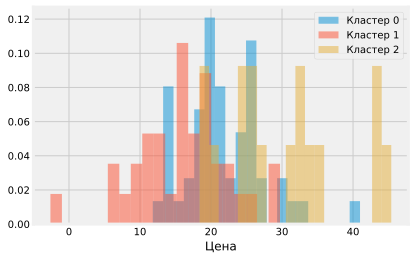

In [50]:
plt.hist(y_test_pred_0, bins=20, density=True, alpha=0.5)
plt.hist(y_test_pred_1, bins=20, density=True, alpha=0.5)
plt.hist(y_test_pred_2, bins=20, density=True, alpha=0.5)

plt.legend(['Кластер 0', 'Кластер 1', 'Кластер 2'])
plt.xlabel('Цена')

plt.show()

In [ ]:
# CRIM

In [47]:
print('Кластер 0: {}'.format(X_train_scaled.loc[labels_train == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_train_scaled.loc[labels_train == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_train_scaled.loc[labels_train == 2, 'CRIM'].mean()))

Кластер 0: -0.35711106398834197
Кластер 1: 0.7961736393464562
Кластер 2: -0.3964942660538023


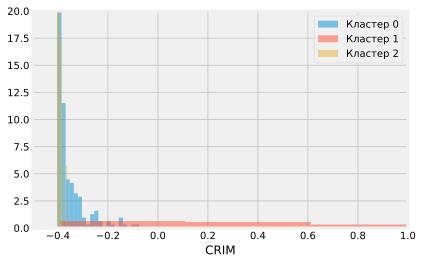

In [55]:
plt.hist(X_train_scaled.loc[labels_train == 0, 'CRIM'], bins=20, density=True, alpha=0.5)
plt.hist(X_train_scaled.loc[labels_train == 1, 'CRIM'], bins=20, density=True, alpha=0.5)
plt.hist(X_train_scaled.loc[labels_train == 2, 'CRIM'], bins=20, density=True, alpha=0.5)


plt.legend(['Кластер 0', 'Кластер 1', 'Кластер 2'])
plt.xlabel('CRIM')
plt.xlim(-0.5,1)
plt.ylim(0,20)
plt.show()